In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Meme Data

In [2]:
# https://www.kaggle.com/SIZZLE/2016electionmemes

## Bernie Memes

In [3]:
# I'm practicing on Bernie Memes because I like him

# First we import the three Bernie meme titles
bernie_memes = pd.read_csv('2016_Meme_Data/Bernie.csv', parse_dates=["timestamp"])
bern_memes = pd.read_csv('2016_Meme_Data/Bern.csv', parse_dates=["timestamp"])
feel_the_bern_memes = pd.read_csv('2016_Meme_Data/Feel_the_Bern.csv', parse_dates=["timestamp"])

# Then we combine them
bernie_memes = bernie_memes.append([feel_the_bern_memes, bern_memes])

# And drop the duplicates
bernie_memes = bernie_memes.drop_duplicates(['id'])

In [4]:
# Next we sort the values by time and cut out meme's from pre 2016, though the primer is technically unnecessary

bernie_memes = bernie_memes.sort_values('timestamp')
bernie_memes = bernie_memes[(bernie_memes['timestamp'] > '2016-01-01') & (bernie_memes['timestamp'] < '2016-12-31')]

bernie_memes.head()

,timestamp,id,link,caption,author,network,likes
973,2016-01-02 21:04:00,2531359,https://facebook.com/363164147066597/posts/927...,LIL BASED\n BERNIE,3.63164E+14,facebook,2
972,2016-01-03 15:40:00,186090,https://facebook.com/663702017034419/posts/988...,Bernie Sanders\n Follow\n @Sen Sanders\n Nobod...,6.63702E+14,facebook,2
1084,2016-01-04 21:10:00,185673,https://facebook.com/663702017034419/posts/989...,THE IDIOTS WHO THINK BERNIE SANDERS\n WILL FIX...,6.63702E+14,facebook,4
781,2016-01-05 03:11:00,834932,http://imgur.com/TjsILvp,U.S. Senator Bernie Sanders\n 8 hrs\n What do ...,libertarianmeme,imgur,0
31,2016-01-08 01:32:00,617928,https://instagram.com/p/BAQn1QOlR0L,When you realize that chipotle you had\n earli...,1328666350,instagram,2323


In [5]:
# Now we count the number of meme's per month

bernie_by_month = bernie_memes['timestamp'].groupby(bernie_memes['timestamp'].dt.month).count()
bernie_by_month = pd.DataFrame(bernie_by_month)
bernie_by_month.columns = ['Total Count']

# And add data on the 'likes' for graphing purposes

bernie_by_month['Total Likes'] = bernie_memes['likes'].groupby(bernie_memes['timestamp'].dt.month).sum()
bernie_by_month['Average Likes'] = bernie_memes['likes'].groupby(bernie_memes['timestamp'].dt.month).mean()

bernie_by_month

,Total Count,Total Likes,Average Likes
timestamp,,,
1,58,71205,1227.672414
2,291,785204,2698.295533
3,168,334357,1990.220238
4,199,187218,940.793970
5,337,60748,180.261128
6,247,64893,262.724696
7,203,64008,315.310345
8,88,31500,357.954545
9,130,82135,631.807692


In [6]:
# November didn't have enough pre-election days for the month to matter

bernie_by_month = bernie_by_month.drop(labels=11)

### Graphing Time

In [7]:
# This will make it easier to plot all the data points

def monthly_data_plot(plot_data, plot_title, plot_yaxis):
    
    plt.figure(figsize=(16,10))
    plt.title(plot_title, size=25)
    
    plt.ylabel(plot_yaxis, size=20)
    plt.xlabel('Months of 2016', size=20)
    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])
    
    plt.plot(plot_data)

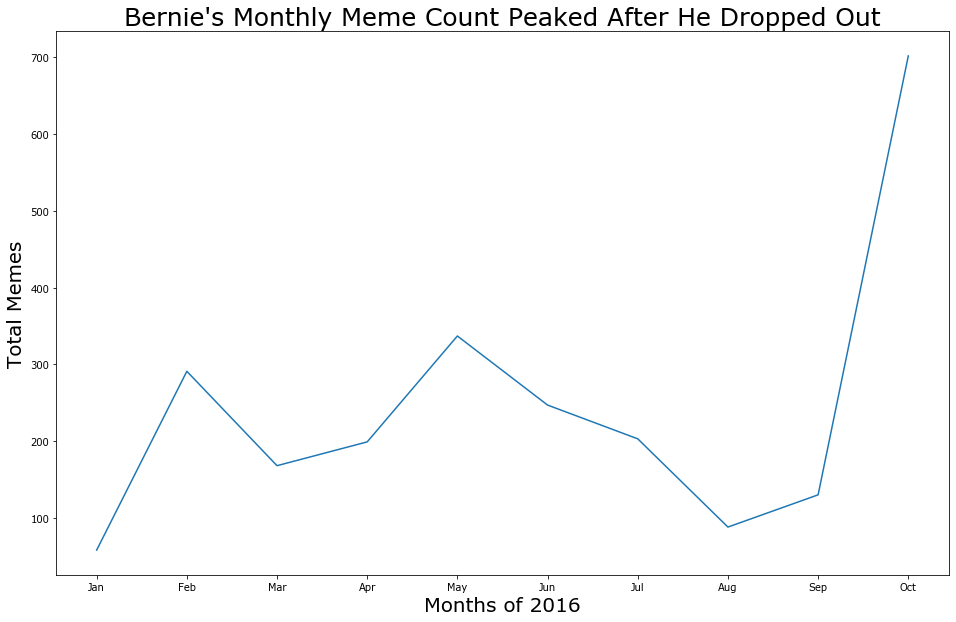

In [8]:
monthly_data_plot(bernie_by_month['Total Count'], "Bernie's Monthly Meme Count Peaked After He Dropped Out", 'Total Memes')

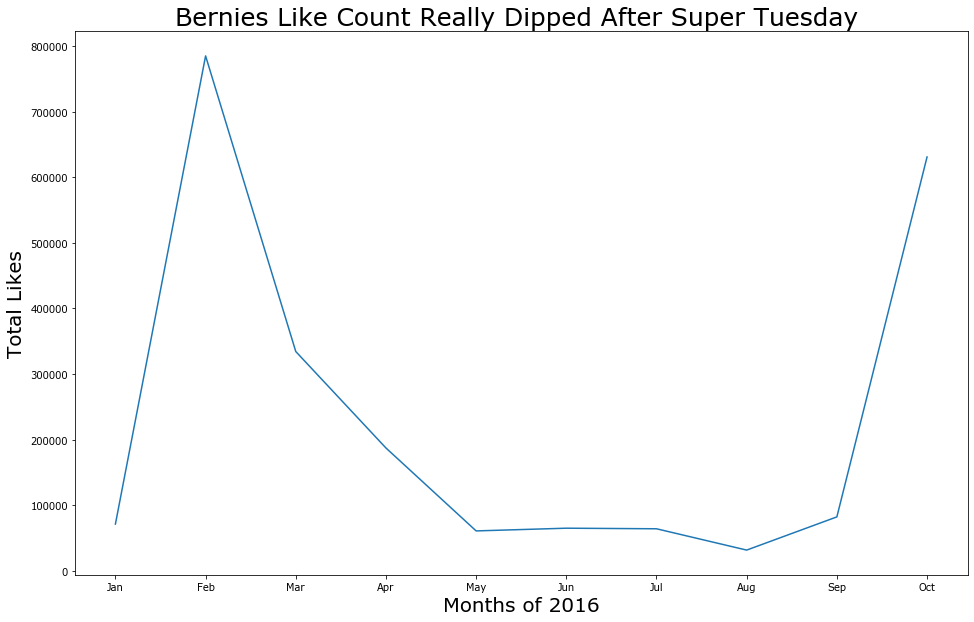

In [9]:
monthly_data_plot(bernie_by_month['Total Likes'], "Bernies Like Count Really Dipped After Super Tuesday ", 'Total Likes')

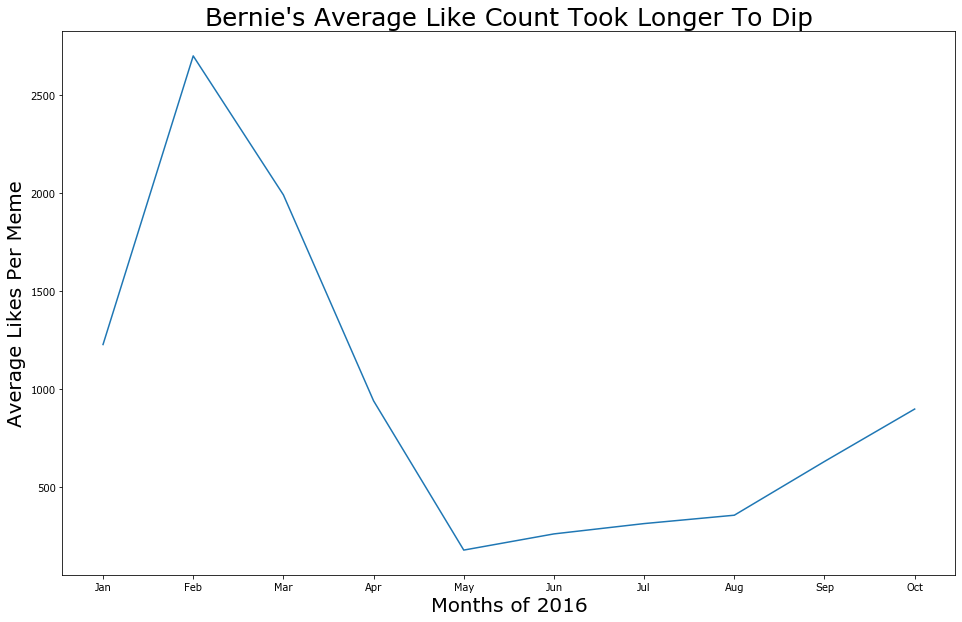

In [10]:
monthly_data_plot(bernie_by_month['Average Likes'], "Bernie's Average Like Count Took Longer To Dip", 'Average Likes Per Meme')

# Now For The Real Data

In [11]:
# Clinton Memes

clinton_memes = pd.read_csv('2016_Meme_Data/Clinton.csv', parse_dates=["timestamp"])
hillary_memes = pd.read_csv('2016_Meme_Data/Hillary.csv', parse_dates=["timestamp"])
with_her_memes = pd.read_csv('2016_Meme_Data/imwithher.csv', parse_dates=["timestamp"])

C:\Users\nolan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (180) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
# Drop the hundred or so Unnamed Columns

hillary_memes = hillary_memes.loc[:, ~hillary_memes.columns.str.contains('^Unnamed')]

In [13]:
# Combine

clinton_memes = clinton_memes.append([hillary_memes, with_her_memes])

In [14]:
# Remove Pe-2016 Meme and November Memes

clinton_memes = clinton_memes[(clinton_memes['timestamp'] > '2016-01-01') & (clinton_memes['timestamp'] <= '2016-10-31')]
clinton_memes = clinton_memes.sort_values(by='timestamp')

clinton_memes.head()

,timestamp,id,link,caption,author,network,likes
2330,2016-01-01 22:11:00,156645,https://facebook.com/145380305523723/posts/100...,inngfip.com\n HILLARY: HEY STATE DEPT\n CAN YO...,1.4538E+14,facebook,1
10090,2016-01-02 01:47:00,643650,https://instagram.com/p/BABM1OxmmL8,Hillary Clinton\n @Hillary Clinton\n @Cabbage ...,836591687,instagram,1878
1138,2016-01-05 02:06:00,835113,http://imgur.com/FuuH1LD,CNN Politics\n Like Page\n 2 hrs\n Maybe we co...,ayylmao,imgur,0
1931,2016-01-05 02:06:00,835113,http://imgur.com/FuuH1LD,CNN Politics\n Like Page\n 2 hrs\n Maybe we co...,ayylmao,imgur,0
1930,2016-01-07 11:58:00,882088,http://imgur.com/AmOLzpg,"Eagle Rising\n Nov 24, 2015 at 6:15pm\n Hillar...",thefacebookdelusion,imgur,0


In [15]:
# Trump Memes
# The data had no category for 'MAGA Memes', which may say something about quality of the data, but it's the best I could find

trump_memes = pd.read_csv('2016_Meme_Data/Trump.csv', parse_dates=["timestamp"])
donald_memes = pd.read_csv('2016_Meme_Data/Donald.csv', parse_dates=["timestamp"])

C:\Users\nolan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (198) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
# These have Unnamed Columns too

donald_memes = donald_memes.loc[:, ~donald_memes.columns.str.contains('^Unnamed')]
trump_memes = trump_memes.loc[:, ~trump_memes.columns.str.contains('^Unnamed')]

In [17]:
# Combine them

trump_memes = trump_memes.append(donald_memes)

In [18]:
# Remove Pe-2016 Meme and November Memes

trump_memes = trump_memes[(trump_memes['timestamp'] > '2016-01-01') & (trump_memes['timestamp'] <= '2016-10-31')]
trump_memes = trump_memes.sort_values(by='timestamp')

trump_memes.head()

,timestamp,id,link,caption,author,network,likes
1679,2016-01-01 12:57:00,835451,http://imgur.com/xtvEjIx,Yoko Ono attempts to devour\n Donald Trump's t...,Teleshits,imgur,0
3159,2016-01-01 12:57:00,835451,http://imgur.com/xtvEjIx,Yoko Ono attempts to devour\n Donald Trump's t...,Teleshits,imgur,0
7384,2016-01-01 14:43:00,645403,https://instagram.com/p/BAAA1wBNOQR,Who's more presidential?\n LIKE DJ Khaled\n IG...,1607993384,instagram,2017
14343,2016-01-01 14:43:00,645403,https://instagram.com/p/BAAA1wBNOQR,Who's more presidential?\n LIKE DJ Khaled\n IG...,1607993384,instagram,2017
13282,2016-01-01 16:35:00,645225,https://instagram.com/p/BAANqTwNOV3,msomod\n atrevytrevvv Nov 3\n ou saw Donald Tr...,1607993384,instagram,922


In [19]:
# Drop Duplicates

clinton_memes.drop_duplicates(inplace=True)
trump_memes.drop_duplicates(inplace=True)

In [20]:
# Let's compare the totals

print(f'Clinton: {len(clinton_memes)}')
print(f'Trump: {len(trump_memes)}')

Clinton: 13076
Trump: 18293


## Weekly Data

In [21]:
# Now we count the memes and likes per week of each candidate

memes_by_week = pd.DataFrame(data=clinton_memes['timestamp'].groupby(clinton_memes['timestamp'].dt.week).count())
memes_by_week.columns = ['Clinton - Number of Memes']
memes_by_week['Clinton - Number of Likes'] = clinton_memes['likes'].groupby(clinton_memes['timestamp'].dt.week).sum()
memes_by_week['Trump - Number of Memes'] = trump_memes['timestamp'].groupby(trump_memes['timestamp'].dt.week).count()
memes_by_week['Trump - Number of Likes'] = trump_memes['likes'].groupby(trump_memes['timestamp'].dt.week).sum()
memes_by_week.index.name = 'Weeks'

In [22]:
memes_by_week.head()

,Clinton - Number of Memes,Clinton - Number of Likes,Trump - Number of Memes,Trump - Number of Likes
Weeks,,,,
1,4,66244,32,298768
2,27,156243,59,584399
3,10,3058,49,186908
4,20,58891,48,470808
5,74,139635,43,194547


In [23]:
# Not sure why it goes from 44 to 53, but both of those need to go

memes_by_week = memes_by_week.drop([44, 53])

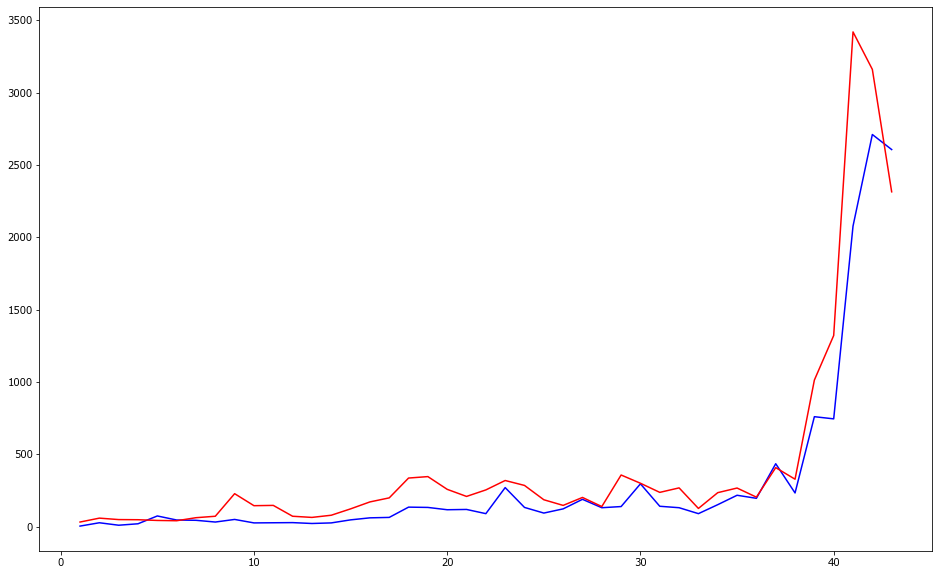

In [24]:
# Let's graph these out to compare

plt.figure(figsize=(16, 10))

plt.plot(memes_by_week['Clinton - Number of Memes'], color='blue')
plt.plot(memes_by_week['Trump - Number of Memes'], color='red')

In [25]:
# Creating columns showing the percent of total memes to aid with visulaization.

memes_by_week['Total Memes'] = memes_by_week['Clinton - Number of Memes'] + memes_by_week['Trump - Number of Memes']
memes_by_week['Clinton - Percent of Memes'] = round(memes_by_week['Clinton - Number of Memes'] / memes_by_week['Total Memes'] * 100)
memes_by_week['Trump - Percent of Memes'] = round(memes_by_week['Trump - Number of Memes'] / memes_by_week['Total Memes'] * 100)

In [26]:
memes_by_week.tail()

,Clinton - Number of Memes,Clinton - Number of Likes,Trump - Number of Memes,Trump - Number of Likes,Total Memes,Clinton - Percent of Memes,Trump - Percent of Memes
Weeks,,,,,,,
39,760,810684,1013,1045886,1773,43.0,57.0
40,745,939238,1321,2228093,2066,36.0,64.0
41,2077,1803958,3419,5000424,5496,38.0,62.0
42,2710,2166071,3160,2869086,5870,46.0,54.0
43,2606,1349770,2314,1373230,4920,53.0,47.0


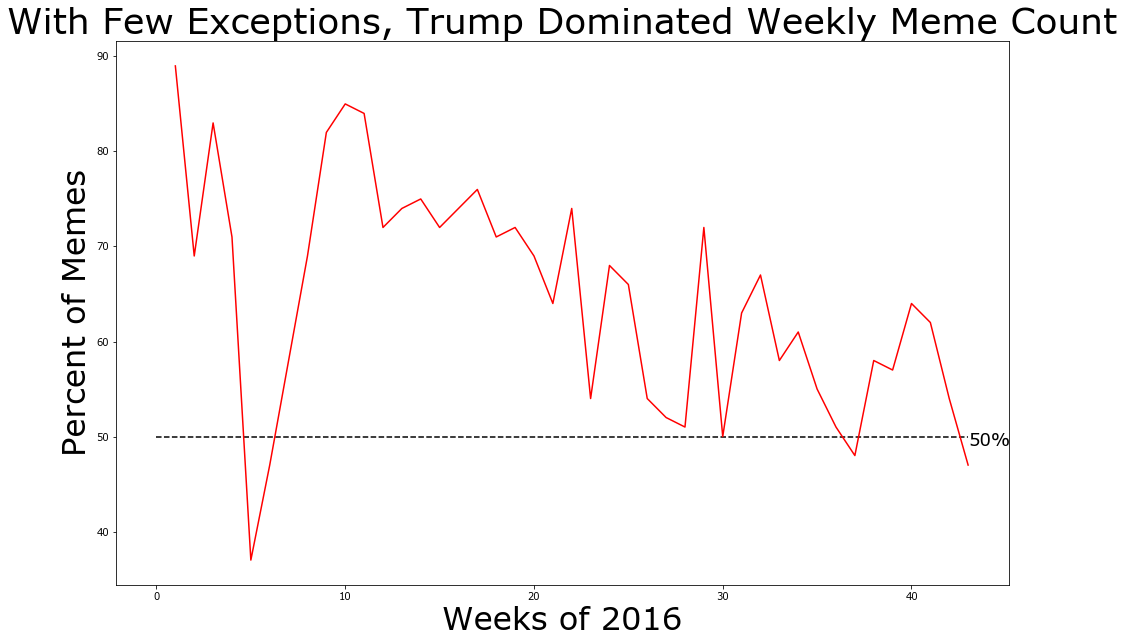

In [27]:
# And let's see the graph

plt.figure(figsize=(16, 10))

plt.title('With Few Exceptions, Trump Dominated Weekly Meme Count', size=36)
plt.xlabel('Weeks of 2016', size=32)
plt.ylabel('Percent of Memes', size=32)
plt.text(x=43, y=49, s='50%', size=18)

plt.hlines(y=50, xmin=0, xmax=43, color='black', linestyles='dashed')

# plt.plot(memes_by_week['Clinton - Percent of Memes'], color='blue');
plt.plot(memes_by_week['Trump - Percent of Memes'], color='red');

## Monthly Data

In [28]:
# Now we count the memes and likes per month of each candidate to see if the graph looks better

memes_by_month = pd.DataFrame(data=clinton_memes['timestamp'].groupby(clinton_memes['timestamp'].dt.month).count())
memes_by_month.columns = ['Clinton - Number of Memes']
memes_by_month['Clinton - Number of Likes'] = clinton_memes['likes'].groupby(clinton_memes['timestamp'].dt.month).sum()
memes_by_month['Trump - Number of Memes'] = trump_memes['timestamp'].groupby(trump_memes['timestamp'].dt.month).count()
memes_by_month['Trump - Number of Likes'] = trump_memes['likes'].groupby(trump_memes['timestamp'].dt.month).sum()
memes_by_month.index.name = 'Months'

In [29]:
memes_by_month.T

Months,1,2,3,4,5,6,7,8,9,10
Clinton - Number of Memes,63,199,141,193,538,639,806,626,1619,8252
Clinton - Number of Likes,286315,495675,337315,472622,226418,274905,657005,273334,1637191,6299713
Trump - Number of Memes,208,231,619,564,1260,1060,1050,975,1952,10374
Trump - Number of Likes,1678358,1421197,3657215,2153273,746667,629530,1214077,789504,1745499,11568204


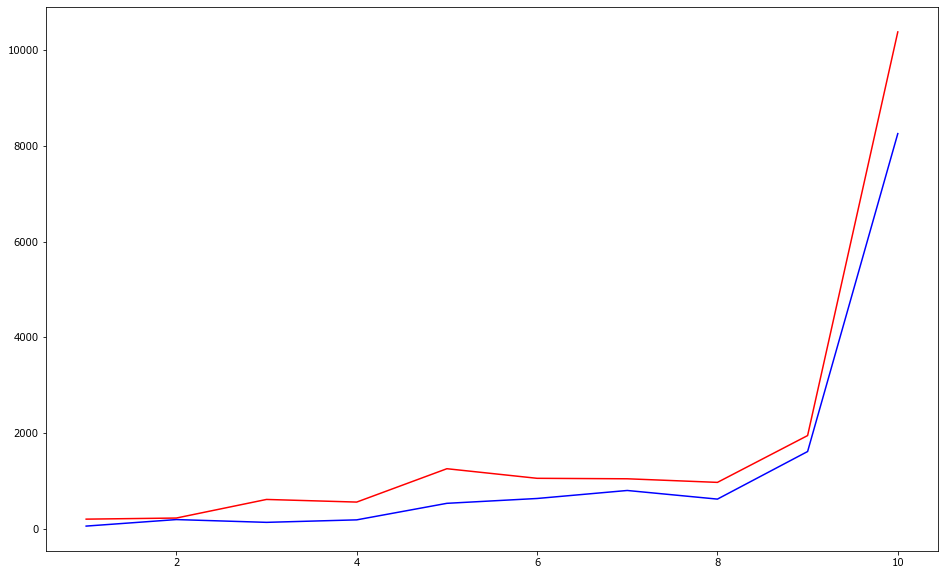

In [30]:
# Let's graph these out to compare

plt.figure(figsize=(16, 10))

plt.plot(memes_by_month['Clinton - Number of Memes'], color='blue')
plt.plot(memes_by_month['Trump - Number of Memes'], color='red');

In [31]:
# Creating columns showing the percent of total memes to aid with visulaization.

memes_by_month['Total Memes'] = memes_by_month['Clinton - Number of Memes'] + memes_by_month['Trump - Number of Memes']
memes_by_month['Clinton - Percent of Memes'] = round(memes_by_month['Clinton - Number of Memes'] / memes_by_month['Total Memes'] * 100)
memes_by_month['Trump - Percent of Memes'] = round(memes_by_month['Trump - Number of Memes'] / memes_by_month['Total Memes'] * 100)

In [32]:
memes_by_month.T

Months,1,2,3,4,5,6,7,8,9,10
Clinton - Number of Memes,63.0,199.0,141.0,193.0,538.0,639.0,806.0,626.0,1619.0,8252.0
Clinton - Number of Likes,286315.0,495675.0,337315.0,472622.0,226418.0,274905.0,657005.0,273334.0,1637191.0,6299713.0
Trump - Number of Memes,208.0,231.0,619.0,564.0,1260.0,1060.0,1050.0,975.0,1952.0,10374.0
Trump - Number of Likes,1678358.0,1421197.0,3657215.0,2153273.0,746667.0,629530.0,1214077.0,789504.0,1745499.0,11568204.0
Total Memes,271.0,430.0,760.0,757.0,1798.0,1699.0,1856.0,1601.0,3571.0,18626.0
Clinton - Percent of Memes,23.0,46.0,19.0,25.0,30.0,38.0,43.0,39.0,45.0,44.0
Trump - Percent of Memes,77.0,54.0,81.0,75.0,70.0,62.0,57.0,61.0,55.0,56.0


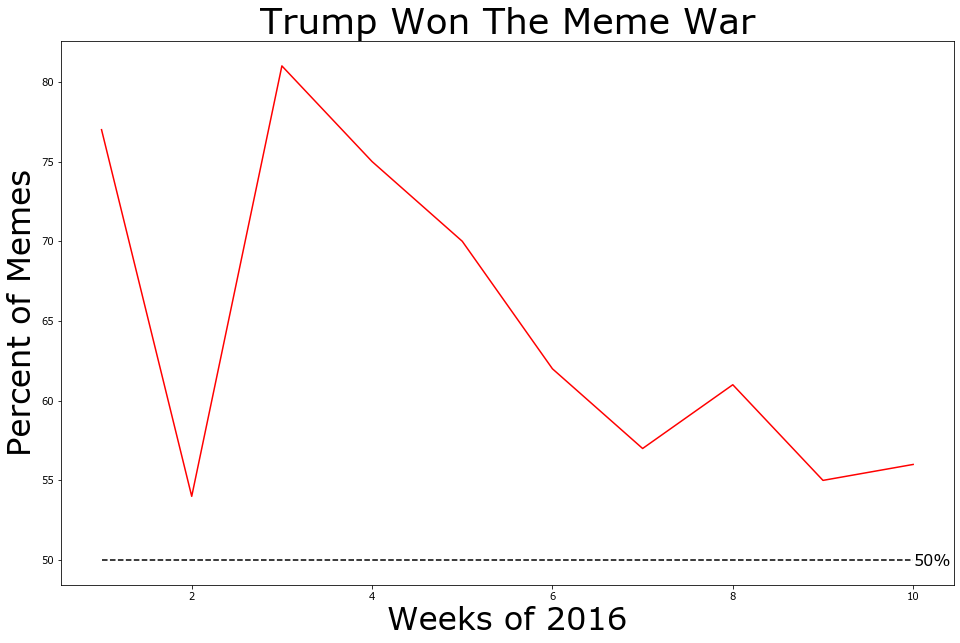

In [33]:
# And let's see the graph

plt.figure(figsize=(16, 10))

plt.title('Trump Won The Meme War', size=36)
plt.xlabel('Weeks of 2016', size=32)
plt.ylabel('Percent of Memes', size=32)
plt.text(x=10, y=49.64, s='50%', size=16)

plt.hlines(y=50, xmin=1, xmax=10, color='black', linestyle='dashed')

# plt.plot(memes_by_month['Clinton - Percent of Memes'], color='blue');
plt.plot(memes_by_month['Trump - Percent of Memes'], color='red');

## Polling Data

In [34]:
# Import the webscrapping libraries

from bs4 import BeautifulSoup
import requests
import lxml.html as lh

In [35]:
# Scrape polling data from realclearpolitics

url = 'https://www.realclearpolitics.com/epolls/2016/president/us/general_election_trump_vs_clinton-5491.html#polls'
res = requests.get(url)

In [36]:
res.status_code

200

In [37]:
# Extract the table of polling data

soup = BeautifulSoup(res.content, 'lxml')

table = soup.find('table', {'class', 'data large'})

In [38]:
# It's only getting the first 12 because the table is collapsed, so I'll just do it the easy way for now

pd.DataFrame(table)

,0,1,2,3,4,5,6
0,[Poll],[Date],[Sample],[MoE],[[[Clinton (D)]]],[[[Trump (R)]]],[Spread]
1,[[Final Results]],[--],[--],[--],[48.2],[46.1],[[Clinton +2.1]]
2,[RCP Average],[11/1 - 11/7],[--],[--],[46.8],[43.6],[[Clinton +3.2]]
3,"[[Bloomberg], [Bloomberg]]",[11/4 - 11/6],[799 LV],[3.5],[46],[43],[[Clinton +3]]
4,"[[IBD/TIPP Tracking], [IBD/TIPP Tracking]]",[11/4 - 11/7],[1107 LV],[3.1],[43],[42],[[Clinton +1]]
5,"[[Economist/YouGov], [Economist]]",[11/4 - 11/7],[3669 LV],[--],[49],[45],[[Clinton +4]]
6,"[[LA Times/USC Tracking], [LA Times]]",[11/1 - 11/7],[2935 LV],[4.5],[44],[47],[[Trump +3]]
7,"[[ABC/Wash Post Tracking], [ABC/WP Tracking]]",[11/3 - 11/6],[2220 LV],[2.5],[49],[46],[[Clinton +3]]
8,"[[FOX News], [FOX News]]",[11/3 - 11/6],[1295 LV],[2.5],[48],[44],[[Clinton +4]]
9,"[[Monmouth], [Monmouth]]",[11/3 - 11/6],[748 LV],[3.6],[50],[44],[[Clinton +6]]


### Copy Pasted CSV

In [51]:
# This is the data from all Clinton v Trump polls leading up to the 2016 election 

polling_data = pd.read_csv("Poll Data.csv")

In [52]:
# Drop Final Result, since it's technically not a poll

polling_data = polling_data.drop(index=0)

In [53]:
# Make the Data column strings

polling_data['Date'] = polling_data['Date'].astype(str)

In [54]:
# Make a new column for the end date of each poll

polling_data[['Start Date','End Date']] = polling_data['Date'].str.split(' - ', expand=True)

In [55]:
polling_data

,Poll,Date,Sample,MoE,Clinton (D),Trump (R),Spread,Start Date,End Date
1,RCP Average,11/1 - 11/7,--,--,46.8,43.6,Clinton +3.2,11/1,11/7
2,Bloomberg,11/4 - 11/6,799 LV,3.5,46.0,43.0,Clinton +3,11/4,11/6
3,IBD/TIPP Tracking,11/4 - 11/7,1107 LV,3.1,43.0,42.0,Clinton +1,11/4,11/7
4,Economist/YouGov,11/4 - 11/7,3669 LV,--,49.0,45.0,Clinton +4,11/4,11/7
5,LA Times/USC Tracking,11/1 - 11/7,2935 LV,4.5,44.0,47.0,Trump +3,11/1,11/7
...,...,...,...,...,...,...,...,...,...
256,PPP (D),7/20 - 7/21,1087 RV,3,50.0,37.0,Clinton +13,7/20,7/21
257,USA Today/Suffolk,7/9 - 7/12,1000 LV,3,51.0,34.0,Clinton +17,7/9,7/12
258,CNN/Opinion Research,6/26 - 6/28,890 RV,3.5,59.0,35.0,Clinton +24,6/26,6/28
259,FOX News,6/21 - 6/23,1005 RV,3,51.0,34.0,Clinton +17,6/21,6/23


In [56]:
# Remove the polling data from 2015

polling_data = polling_data[:222]

In [57]:
polling_data

,Poll,Date,Sample,MoE,Clinton (D),Trump (R),Spread,Start Date,End Date
1,RCP Average,11/1 - 11/7,--,--,46.8,43.6,Clinton +3.2,11/1,11/7
2,Bloomberg,11/4 - 11/6,799 LV,3.5,46.0,43.0,Clinton +3,11/4,11/6
3,IBD/TIPP Tracking,11/4 - 11/7,1107 LV,3.1,43.0,42.0,Clinton +1,11/4,11/7
4,Economist/YouGov,11/4 - 11/7,3669 LV,--,49.0,45.0,Clinton +4,11/4,11/7
5,LA Times/USC Tracking,11/1 - 11/7,2935 LV,4.5,44.0,47.0,Trump +3,11/1,11/7
...,...,...,...,...,...,...,...,...,...
218,Quinnipiac,2/10 - 2/15,1342 RV,2.7,44.0,43.0,Clinton +1,2/10,2/15
219,Quinnipiac,2/2 - 2/4,1125 RV,2.9,46.0,41.0,Clinton +5,2/2,2/4
220,PPP (D),2/2 - 2/3,1236 RV,2.8,47.0,40.0,Clinton +7,2/2,2/3
221,NBC News/Wall St. Jrnl,1/9 - 1/13,800 RV,3.5,51.0,41.0,Clinton +10,1/9,1/13


In [58]:
polling_data['Start Date'] = polling_data['Start Date'].astype(str) + '/2016'
polling_data['End Date'] = polling_data['End Date'].astype(str) + '/2016'

C:\Users\nolan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\nolan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
# Change the string date columns to datetime

polling_data['Start Date'] = pd.to_datetime(polling_data['Start Date'])
polling_data['End Date'] = pd.to_datetime(polling_data['End Date'])

C:\Users\nolan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nolan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [65]:
# Add a column for weeks of the polls

polling_data['Start Week'] = polling_data['Start Date'].dt.week
polling_data['End Week'] = polling_data['End Date'].dt.week

C:\Users\nolan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nolan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


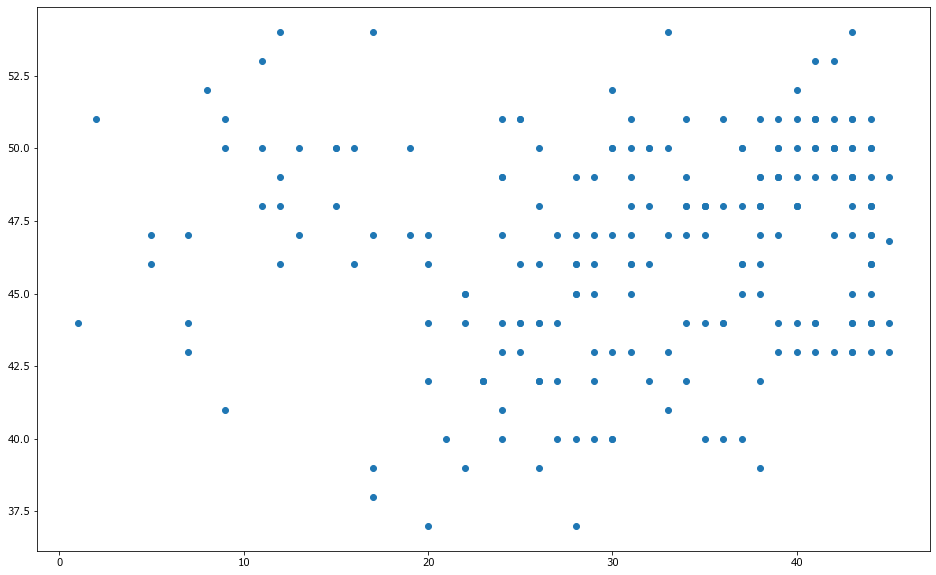

In [76]:
# This looks like a mess

plt.figure(figsize=(16, 10))

plt.scatter(polling_data['End Week'], polling_data['Clinton (D)'])

1      44
2      44
3      44
4      44
5      44
       ..
218     6
219     5
220     5
221     1
222     1
Name: Start Week, Length: 222, dtype: int64